# Project: Investigate a Dataset - [tmdb_movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


### Question(s) for Analysis
1. What factors best predict profit_adj (revenue_adj − budget_adj): budget_adj, genre, runtime, popularity, or cast size?
2. Which production companies produce the most profitable movies on average?
3. What is the distribution of ROI and how many movies are loss-making versus profitable?


In [3]:
# Use this cell to set up import statements for all of the packages that you
## upload libraries to the workspace.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
import time
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

<a id='wrangling'></a>
## Data Wrangling

1. Load dataset (tmdb-movies.csv)
2. Inspect dataset

In [4]:
# Load your data and print out a few lines. What is the size of your dataframe? 
df = pd.read_csv('tmdb-movies.csv')
print(df.head())

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

In [5]:
# Display the size of the DataFrame
print(f'DataFrame shape: {df.shape}')

DataFrame shape: (10866, 21)


In [6]:
# Display the column names in the DataFrame
print(df.columns)

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')


In [7]:
# Check for missing values
print(df.isnull().sum())

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


In [8]:
# Check data types of each column
print(df.dtypes)

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


In [9]:
# Display summary statistics for numerical columns
print(df.describe())

                  id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.8129


### Data Cleaning
1. Remove duplicates
2. Handle missing values
3. Convert data types as needed
4. Standardize text data
5. Remove outliers as needed
6. Rename columns for clarity
7. Print out a few lines of the claened dataframe

In [87]:
#   1. Remove duplicates
df = df.drop_duplicates()

In [88]:
#   2. Handle missing values
df = df.dropna()

In [89]:
#   3. Convert data types if necessary
df['release_date'] = pd.to_datetime(df['release_date'])

In [90]:
#   4. Standardize text data
df['original_title'] = df['original_title'].str.title()

In [91]:
#   5. Remove outliers if necessary. For example, removing movies with budget or revenue of zero
df = df[(df['budget'] > 0) & (df['revenue'] > 0)]

In [92]:
#   6. Rename columns for clarity
df = df.rename(columns={'popularity': 'popularity_score'})

In [93]:
#   7. Print out a few lines of your cleaned dataframe and
print(df.head())

       id    imdb_id  popularity_score     budget     revenue  \
0  135397  tt0369610         32.985763  150000000  1513528810   
1   76341  tt1392190         28.419936  150000000   378436354   
2  262500  tt2908446         13.112507  110000000   295238201   
3  140607  tt2488496         11.173104  200000000  2068178225   
4  168259  tt2820852          9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage         

<a id='eda'></a>
## Exploratory Data Analysis

In [94]:
#  Initial data exploration after cleaning
print(df.describe())
print(df.info())

                  id  popularity_score        budget       revenue  \
count    1287.000000       1287.000000  1.287000e+03  1.287000e+03   
mean    52557.491064          1.786022  5.200349e+07  1.762444e+08   
min        11.000000          0.010335  1.000000e+00  4.300000e+01   
25%      5851.500000          0.664783  1.400000e+07  2.565097e+07   
50%     20178.000000          1.152354  3.200000e+07  8.208716e+07   
75%     62209.500000          2.125342  7.000000e+07  2.140694e+08   
max    333348.000000         32.985763  4.250000e+08  2.781506e+09   
std     74450.077163          2.172137  5.514540e+07  2.538156e+08   

           runtime                   release_date   vote_count  vote_average  \
count  1287.000000                           1287  1287.000000   1287.000000   
mean    110.273504  2008-10-20 15:37:37.342657536   947.266511      6.279487   
min      63.000000            1975-03-13 00:00:00    10.000000      2.200000   
25%      97.000000            2006-04-24 12:00:00

### Research Question 1: What factors best predict profit_adj (revenue_adj − budget_adj): budget_adj, genre, runtime, popularity, or cast size?

In [95]:
#   What factors best predict profit_adj (revenue_adj − budget_adj): budget_adj, genre, runtime, popularity, or cast size?
df['profit_adj'] = df['revenue_adj'] - df['budget_adj']
model = ols('profit_adj ~ budget_adj + runtime + popularity_score', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             profit_adj   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     247.2
Date:                Wed, 19 Nov 2025   Prob (F-statistic):          1.44e-126
Time:                        18:03:02   Log-Likelihood:                -26501.
No. Observations:                1287   AIC:                         5.301e+04
Df Residuals:                    1283   BIC:                         5.303e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.966e+08   3.62e+07  

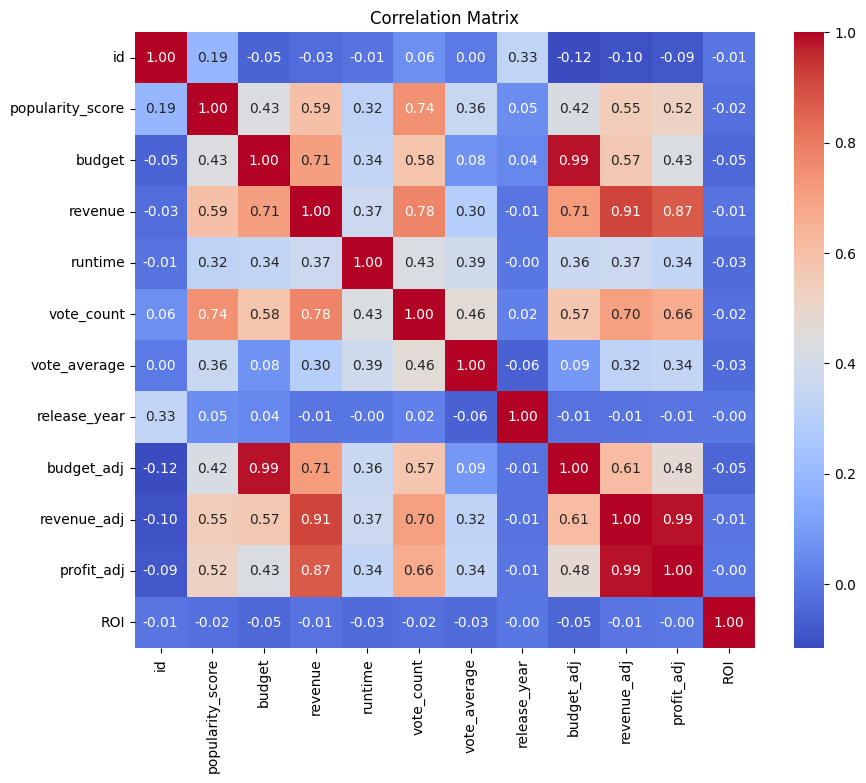

In [96]:
# Visualizations correlation matrix
plt.figure(figsize=(10,8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The plot_hist function creates a histogram for a specified column in the DataFrame, allowing for easy visualization of data distributions.

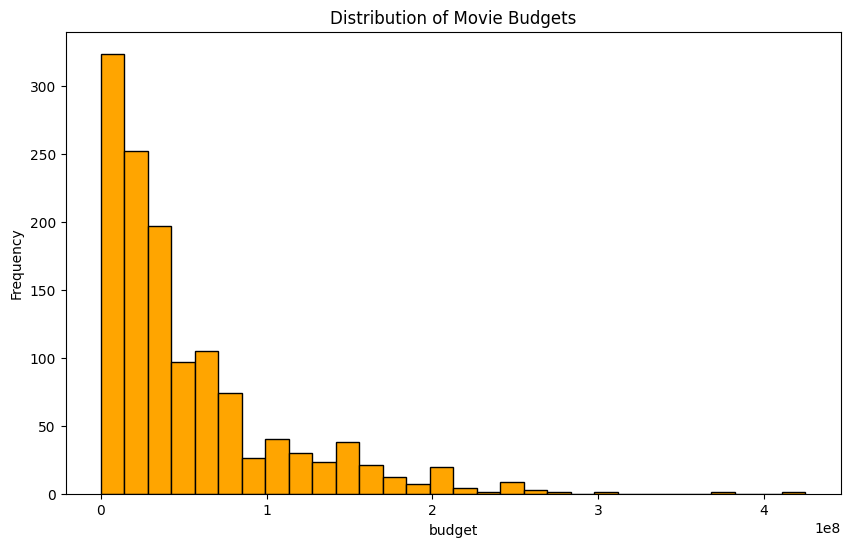

In [121]:
def plot_hist(df, column, bins=5, color="skyblue", title=None):
    """
    Reusable histogram plotting function.
    """
    plt.figure(figsize=(10,6))
    plt.hist(df[column], bins=bins, color=color, edgecolor="black")
    plt.title(title if title else f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()
# Example usage of the reusable function
plot_hist(df, 'budget', bins=30, color='orange', title='Distribution of Movie Budgets')

The budget distribution shows that most movies have a budget below $50 million, with a long tail extending to higher budgets. This indicates that while a few movies have very high budgets, the majority are produced with more modest financial resources. The mean budget is higher than the median, suggesting that a few high-budget films are skewing the average upwards.

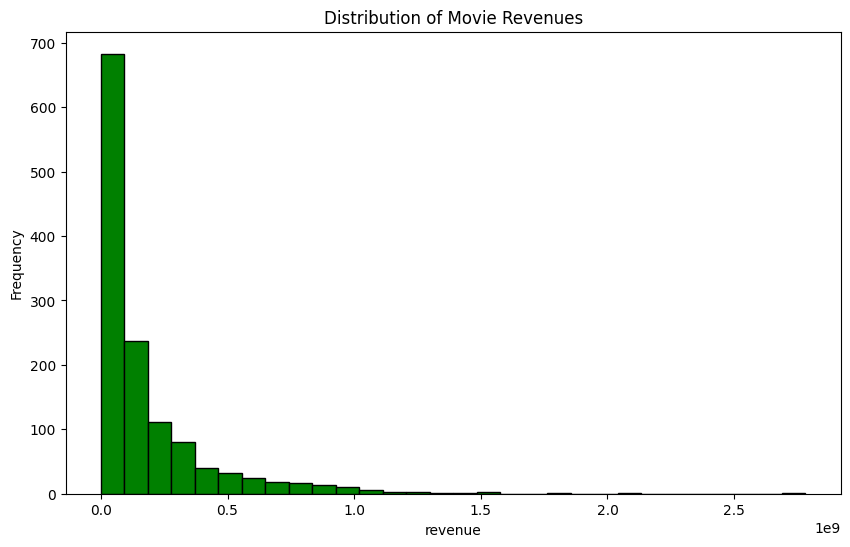

In [122]:
# Use plot_hist to create a histogram of revenue
plot_hist(df, 'revenue', bins=30, color='green', title='Distribution of Movie Revenues')

Both budget and revenue distributions are right-skewed, indicating that while most movies have moderate budgets and revenues, a few blockbuster films have extremely high values, significantly impacting the average.

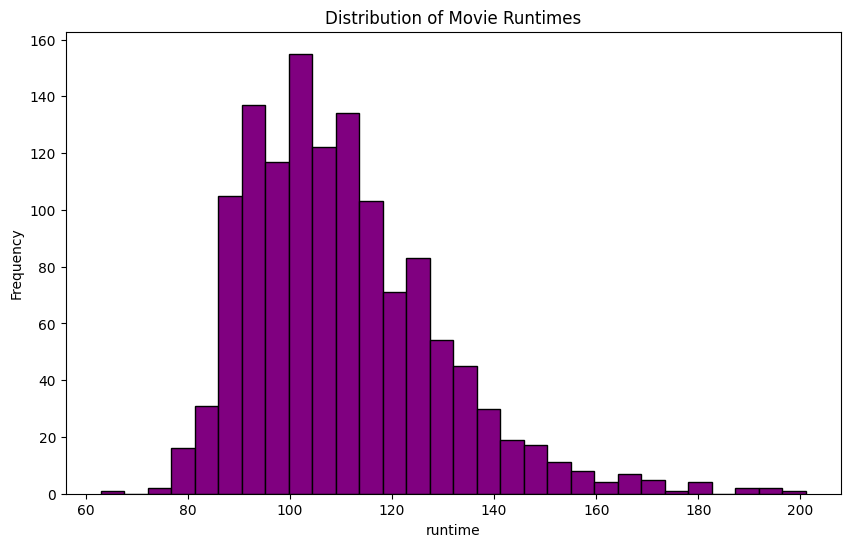

In [123]:
# Use plot_hist to create a histogram of runtime
plot_hist(df, 'runtime', bins=30, color='purple', title='Distribution of Movie Runtimes')

The runtime distribution indicates that most movies have a runtime between 80 and 140 minutes, with a peak around 100-120 minutes. This suggests that filmmakers tend to favor this range for feature-length films.

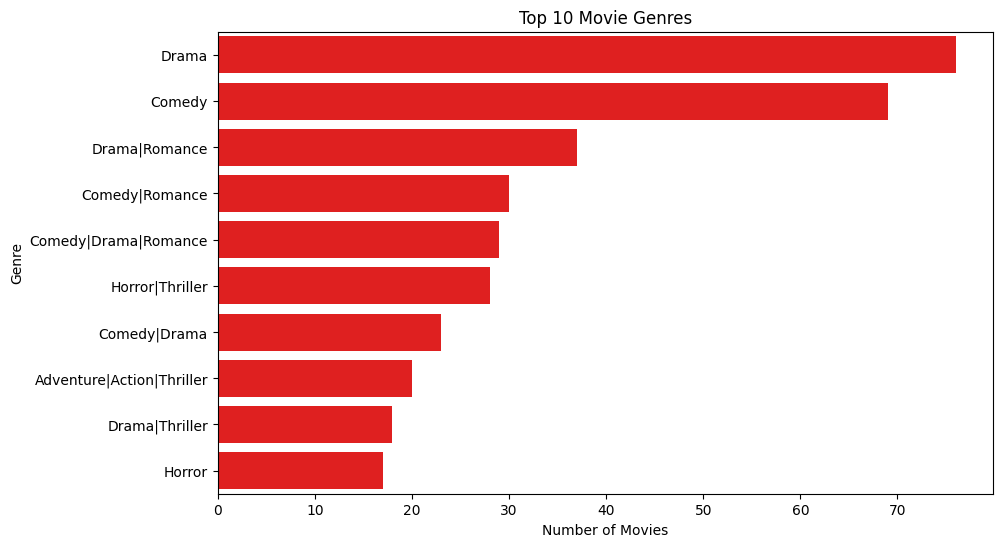

In [124]:
# Bar plot of the top 10 genres
top_genres = df['genres'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, color='red')
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

The genre distribution shows that certain genres, such as Drama and Comedy, are more prevalent in the dataset. This could be due to their broad appeal and versatility in storytelling, making them popular choices for filmmakers. Other genres like Horror and Science Fiction are less common, possibly reflecting niche audiences or higher production costs associated with these genres.

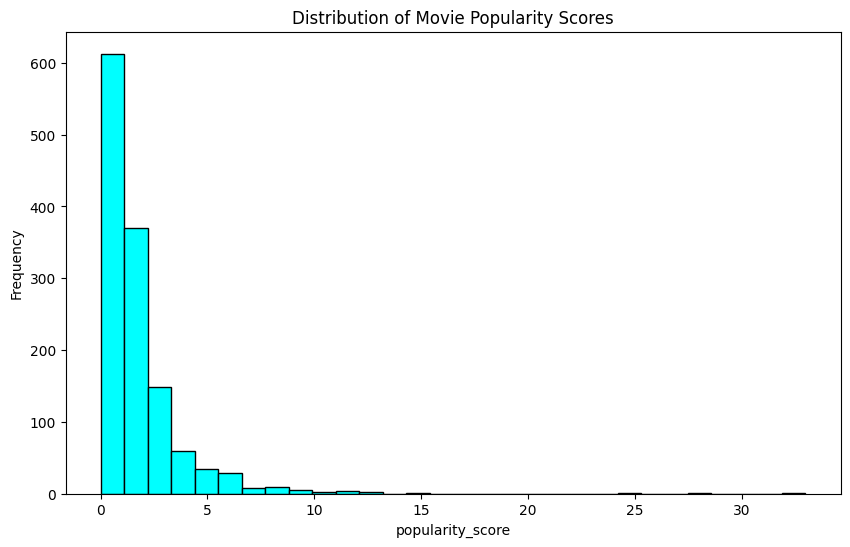

In [125]:
# Use plot_hist to create a histogram of popularity
plot_hist(df, 'popularity_score', bins=30, color='cyan', title='Distribution of Movie Popularity Scores')

The popularity score distribution indicates how frequently movies are viewed or rated. A right-skewed distribution suggests that most movies have lower popularity scores, with a few movies achieving very high popularity. This pattern is common in entertainment, where a small number of blockbuster hits dominate audience attention.

### Research Question 2: Which production companies produce the most profitable movies on average?

In [119]:
# Which production companies produce the most profitable movies on average?
company_profitability = df.groupby('production_companies')['profit_adj'].mean().sort_values(ascending=False)
print(company_profitability.head())

production_companies
Ingenious Film Partners|Twentieth Century Fox Film Corporation|Dune Entertainment|Lightstorm Entertainment    2.586237e+09
Paramount Pictures|Twentieth Century Fox Film Corporation|Lightstorm Entertainment                            2.234714e+09
Warner Bros.|Hoya Productions                                                                                 2.128036e+09
Universal Pictures|Zanuck/Brown Productions                                                                   1.878643e+09
Lucasfilm|Twentieth Century Fox Film Corporation                                                              1.770043e+09
Name: profit_adj, dtype: float64


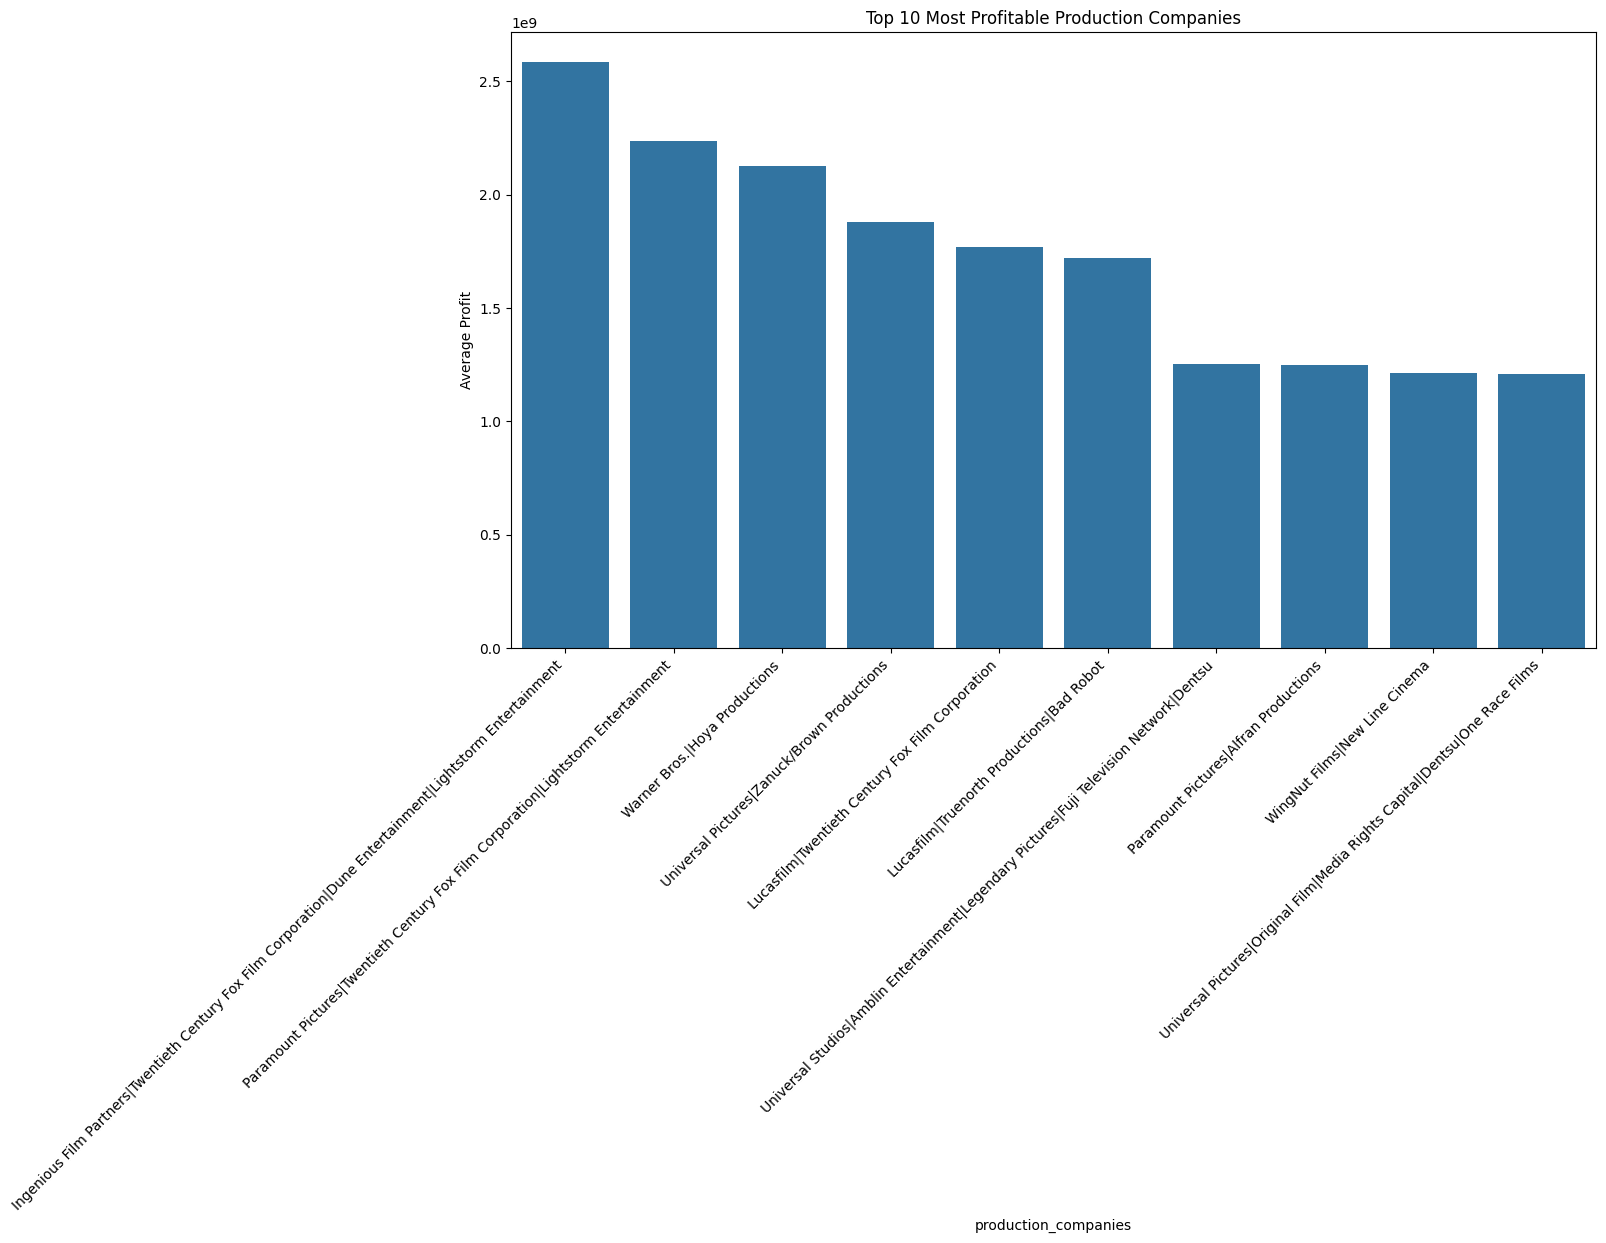

In [ ]:
# Visualize the distribution of the most profitable production companies
top_companies = company_profitability.head(10)
plt.figure(figsize=(14,8))
sns.barplot(x=top_companies.index, y=top_companies.values)
plt.xticks(rotation=45, ha='right', color='black')
plt.title('Top 10 Most Profitable Production Companies')
plt.ylabel('Average Profit')
plt.show()

The most profitable companies on average tend to be those with a strong track record of successful films, effective budgeting, and popular franchises. These companies likely have better resources, talent, and market strategies that contribute to higher profitability.

### Research Question 3: What is the distribution of ROI and how many movies are loss-making versus profitable?

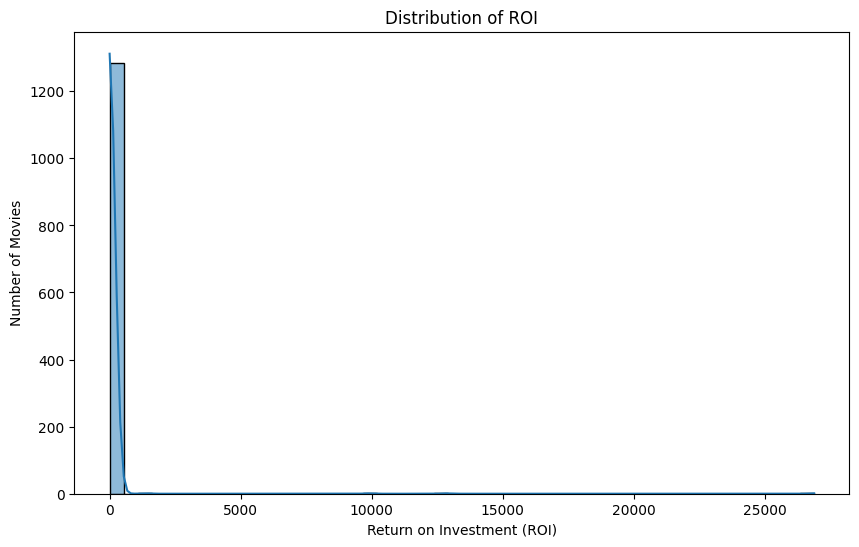

In [126]:
# What is the distribution of ROI and how many movies are loss-making versus profitable?
df['ROI'] = (df['revenue'] - df['budget']) / df['budget']
plt.figure(figsize=(10,6))
sns.histplot(df['ROI'], bins=50, kde=True)
plt.title('Distribution of ROI')
plt.xlabel('Return on Investment (ROI)')
plt.ylabel('Number of Movies')
plt.show()

The ROI distribution shows the profitability of movies relative to their budgets. A significant number of movies have negative ROI, indicating they lost money. However, there are also movies with very high ROI, suggesting some films are highly profitable. The distribution is likely right-skewed, reflecting a few blockbuster successes amidst many less profitable films.

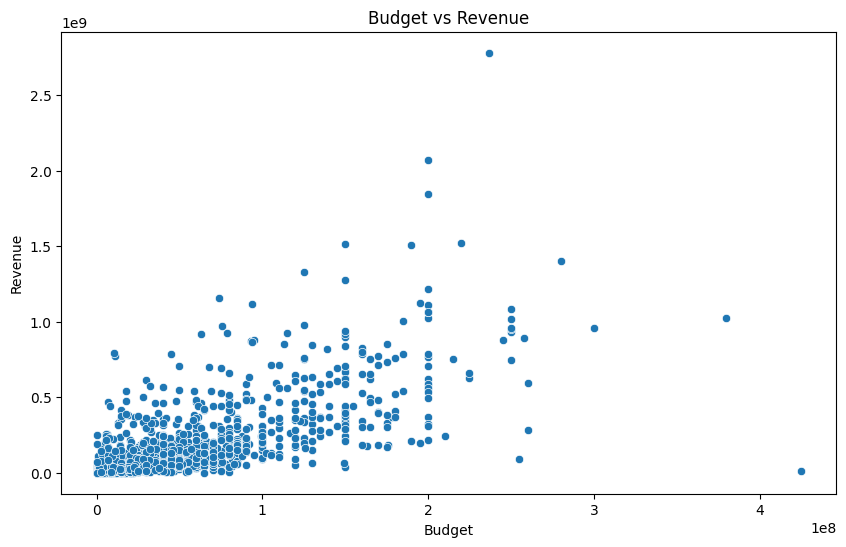

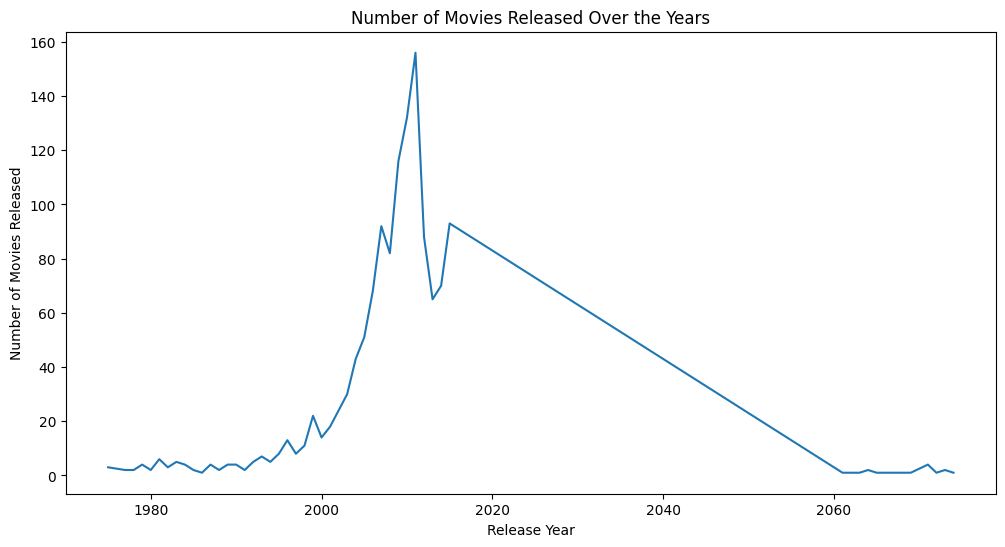

In [127]:
# Visualization of other interesting aspects of the dataset
#   - What are the most common genres?
#   - How does budget correlate with revenue?
#   - Are there any trends in movie releases over the years?
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='budget', y='revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Budget vs Revenue')
plt.show()
df['release_year'] = df['release_date'].dt.year
release_year_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.lineplot(x=release_year_counts.index, y=release_year_counts.values)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released Over the Years')
plt.show()

The scatter plot shows a positive correlation between budget and revenue, indicating that movies with higher budgets tend to generate higher revenues. However, there is considerable variability, suggesting that a large budget does not guarantee high revenue. Some low-budget movies also achieve significant revenue, highlighting the influence of other factors such as genre, marketing, and audience reception.

The line plot indicates trends in movie releases over the years. There may be periods of increased movie production, possibly due to industry growth, technological advancements, or changes in audience demand. Peaks in movie releases could correspond to specific events in the film industry or broader economic conditions that encourage or discourage movie production.

<a id='conclusions'></a>
## Conclusions

This analysis used a 10,000‑movie TMDb dataset that includes user ratings, revenue, and inflation‑adjusted budget and revenue in 2010 dollars. The goal was to surface patterns in popularity, financial performance, and how features like genres, cast, and runtime relate to ratings and profitability.

Key findings:

1. Revenue and profit are highly skewed with a small number of blockbusters driving most aggregate revenue while many films lose money.
2. Budget is a strong but imperfect predictor of revenue; higher budgets increase upside but do not guarantee profitability.
3. Genre and cast matter: certain genres and recurring high‑profile cast members are associated with higher median revenue and vote counts.
4. User engagement and ratings are only loosely correlated with box office; popularity and vote_count explain some variance in revenue but not all.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should see output that starts with `NbConvertApp] Converting notebook`, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb